<a href="https://colab.research.google.com/github/sriparna-18/Image-Classification/blob/main/FlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
# Correct the data_dir to point to the actual image directories
data_dir = data_dir/'flower_photos'
data_dir

PosixPath('datasets/flower_photos/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/flower_photos/daisy/11439894966_dca877f0cd.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/6299910262_336309ffa5_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2538504987_fe524b92a8_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/8063844363_db3f4dea85.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/5561775629_a2b709b3a4_n.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
!ls -l ./datasets/flower_photos

total 4
drwxr-x--- 7 270850 5000 4096 Feb 10  2016 flower_photos


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/flower_photos/daisy/11439894966_dca877f0cd.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/6299910262_336309ffa5_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2538504987_fe524b92a8_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/8063844363_db3f4dea85.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/5561775629_a2b709b3a4_n.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/8035910225_125beceb98_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/8674140377_ae7b0be523.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14747962886_2bff6bb323_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3045046293_57f6d52065_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5234278003_d827fcd73b_m.jpg')]

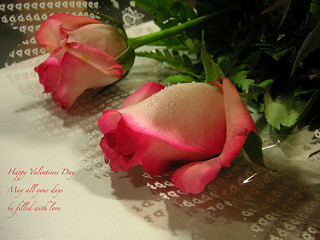

In [ ]:
import PIL
PIL.Image.open(str(roses[53]))

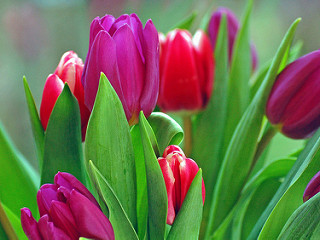

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[5]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/8035910225_125beceb98_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/8674140377_ae7b0be523.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14747962886_2bff6bb323_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3045046293_57f6d52065_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5234278003_d827fcd73b_m.jpg')]

In [ ]:
import cv2
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:

img.shape

(213, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

# Create the flowers_labels_dict
flowers_labels_dict = {flower_name: i for i, flower_name in enumerate(flowers_images_dict.keys())}

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
import numpy as np

X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3615 - loss: 1.4999
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5961 - loss: 1.0496
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6848 - loss: 0.8245
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7598 - loss: 0.6400
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8599 - loss: 0.4037
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9364 - loss: 0.2080
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9693 - loss: 0.1231
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9920 - loss: 0.0473
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9755 - loss: 0.0764
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9776 - loss: 0.0763
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9936 - loss: 0.0341
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.3164 - loss: 1.7609
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6054 - loss: 0.9980
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6853 - loss: 0.7989
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8064 - loss: 0.5371
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8834 - loss: 0.3500
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9415 - loss: 0.1872
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9540 - loss: 0.1450
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9789 - loss: 0.0722
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9859 - loss: 0.0536
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9961 - loss: 0.0181
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9933 - loss: 0.0228
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy:

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6314 - loss: 2.5133


[2.757327079772949, 0.6209150552749634]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


array([[-1.8542691e+00,  8.0173779e+00,  3.5600708e+00,  5.3856283e-01,
        -5.7890654e+00],
       [ 4.4238067e+00, -2.5874503e+00, -1.0362447e+01, -9.0649211e-01,
         3.3674855e+00],
       [ 2.1476357e+00,  8.0586519e+00,  3.6378956e+00, -6.0188332e+00,
        -8.6468306e+00],
       ...,
       [-4.5199986e+00, -2.1642408e+00, -1.8715693e+00,  1.0584562e+01,
        -6.0070477e+00],
       [ 3.7063589e+00,  2.3033290e+00,  4.2025070e+00, -6.6859822e+00,
        -3.0300202e+00],
       [ 2.5187054e+00, -1.1738840e+01, -1.0780953e-02,  1.1981999e+00,
         6.0253769e-01]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])
np.argmax(score)
y_test[0]

np.int64(1)

In [ ]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal", input_shape=(180,
                                                              180,
                                                              3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


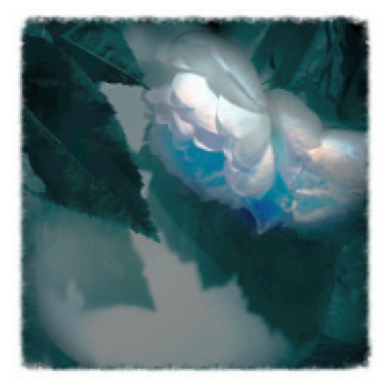

In [ ]:
import matplotlib.pyplot as plt

plt.axis('off')
plt.imshow(X[2])

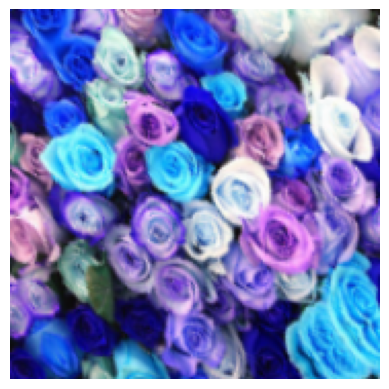

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.3324 - loss: 1.6268
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.5798 - loss: 1.0490
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6290 - loss: 0.9409
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6897 - loss: 0.8447
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7050 - loss: 0.7814
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7022 - loss: 0.7952
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7122 - loss: 0.7460
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7260 - loss: 0.7156
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7510 - loss: 0.6687
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7371 - loss: 0.6853
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7748 - loss: 0.6242
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy:

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7712 - loss: 0.9698


[1.0058860778808594, 0.7516340017318726]